In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataframe = pd.read_csv('train.csv')
dataframe = dataframe.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked','Fare'])
dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [3]:
dataframe.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

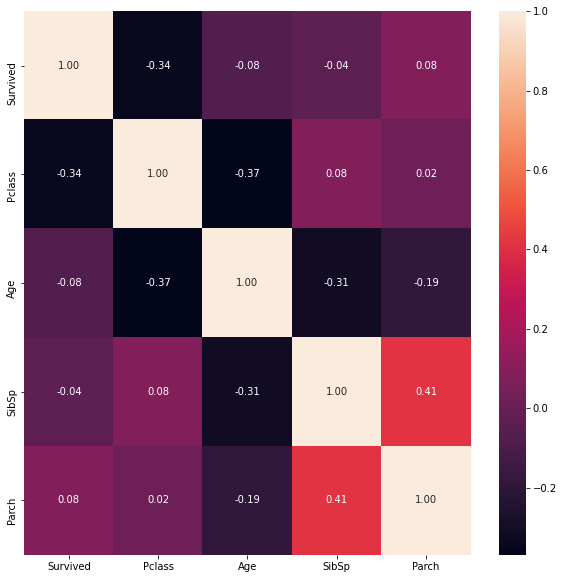

In [4]:
plt.figure(figsize = (10,10))
sns.heatmap(dataframe.corr(), annot = True, fmt = '.2f')

In [5]:
test_dataframe = pd.read_csv('test.csv')
test_dataframe = test_dataframe.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked','Fare'])
test_dataframe.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [6]:
X = dataframe.iloc[: ,1:].values
y = dataframe.iloc[: ,0].values 
test = test_dataframe.iloc[:,:].values 

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X[:,2:3])
X[:,2:3] = imputer.fit_transform(X[:,2:3])
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(test[:,2:3])
test[:,2:3] = imputer.fit_transform(test[:,2:3])

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [9]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
test = ct.fit_transform(test)

In [10]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:,2:] = sc.fit_transform(X[:,2:])
test[:,2:] = sc.transform(test[:,2:])

In [12]:
ann = tf.keras.models.Sequential()

In [13]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [14]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [15]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [16]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# X_train = np.asarray(X_train).astype(np.float32)
# y_train = np.asarray(y_train).astype(np.float32)
# X_test = np.asarray(X_test).astype(np.float32)
# y_test = np.asarray(y_test).astype(np.float32)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)
test = np.asarray(test).astype(np.float32)

In [18]:
ann.fit(X,y, batch_size=32, epochs=200)

Epoch 1/200
28/28 [==============================] - 0s 912us/step - loss: 0.6582 - accuracy: 0.6678
Epoch 2/200
28/28 [==============================] - 0s 927us/step - loss: 0.6247 - accuracy: 0.6790
Epoch 3/200
28/28 [==============================] - 0s 902us/step - loss: 0.5994 - accuracy: 0.6970
Epoch 4/200
28/28 [==============================] - 0s 966us/step - loss: 0.5796 - accuracy: 0.7172
Epoch 5/200
28/28 [==============================] - 0s 915us/step - loss: 0.5641 - accuracy: 0.7441
Epoch 6/200
28/28 [==============================] - 0s 969us/step - loss: 0.5527 - accuracy: 0.7452
Epoch 7/200
28/28 [==============================] - 0s 910us/step - loss: 0.5446 - accuracy: 0.7520
Epoch 8/200
28/28 [==============================] - 0s 939us/step - loss: 0.5379 - accuracy: 0.7565
Epoch 9/200
28/28 [==============================] - 0s 925us/step - loss: 0.5322 - accuracy: 0.7621
Epoch 10/200
28/28 [==============================] - 0s 935us/step - loss: 0.5277 - accura

In [19]:
y_pred = ann.predict(test)
pred = []
for predictions in range (len(y_pred)):
  pred.append(1) if (y_pred[predictions]>0.5) else pred.append(0)

# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

In [20]:
pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,


In [21]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = pred
submission.to_csv('gender_submission.csv',index = False)